<a href="https://colab.research.google.com/github/GerardoMayel/deep_learning/blob/main/red_neuronal_convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

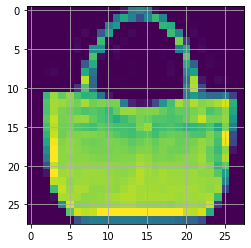

In [8]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
%matplotlib inline

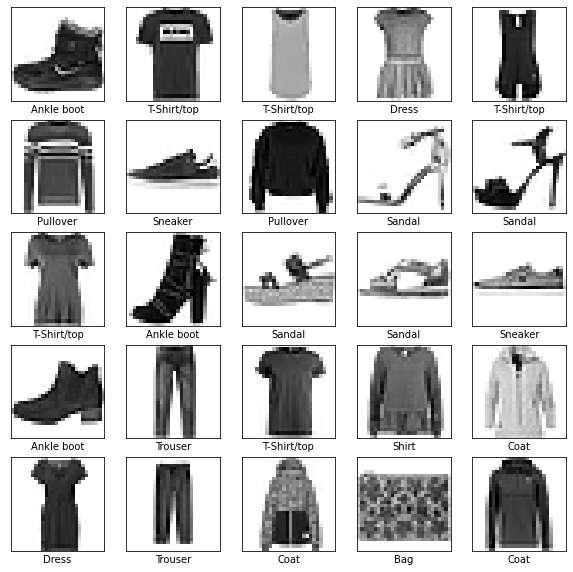

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap= plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [12]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation= tf.nn.softmax)])

<H3>Compilacion<H3>

hay que cambiar tf.train.AdamOptimizer() por tf.optimizers.Adam()

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4998 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3802 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8906


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3458 - accuracy: 0.8746
Accuracy  0.8745999932289124


In [16]:
predictions = model.predict(test_images)

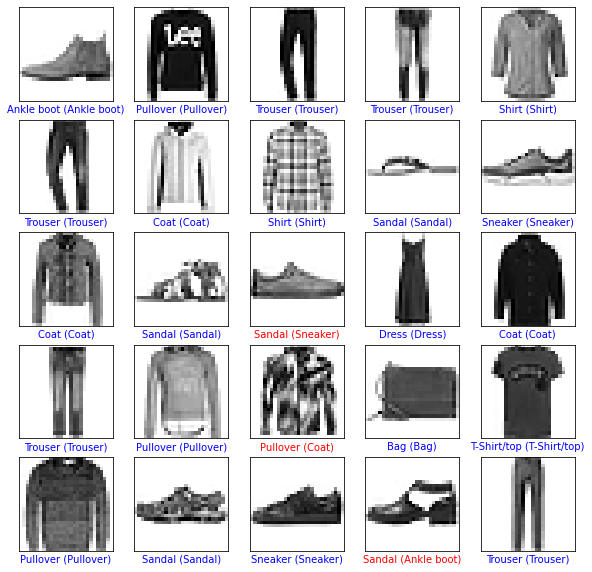

In [23]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], 
                              class_names[true_label]), 
             color = color)